In [30]:
import numpy as np 
import pandas as pd

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [4]:
train = pd.read_csv('T:/Data/train.csv')
test = pd.read_csv('T:/Data/test.csv')

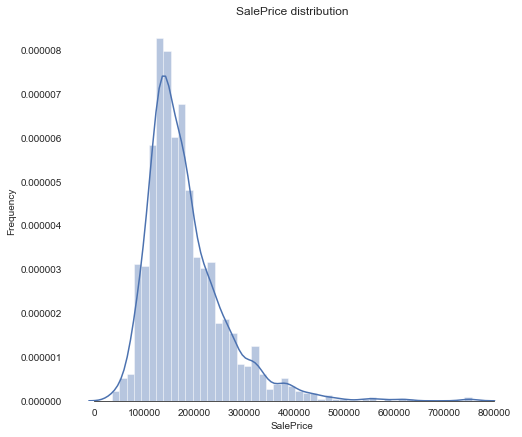

In [5]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
test.shape

(1459, 80)

In [9]:
data = pd.concat([train,test])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [13]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,755000.000000


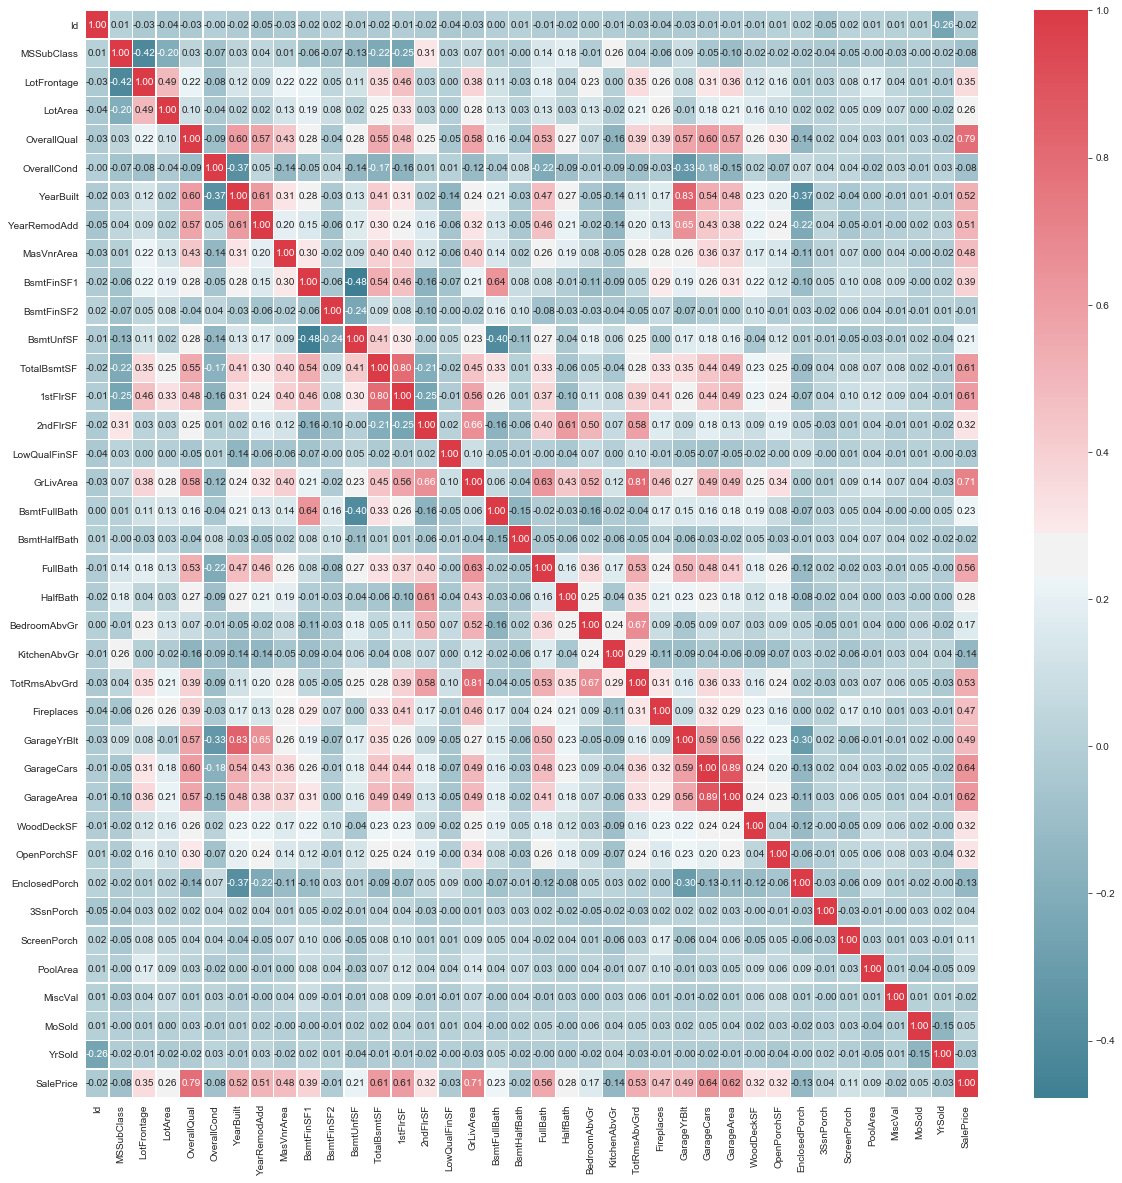

In [10]:
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize = (20,20))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30,
            cmap = colormap, linecolor='white')
plt.show()

data.info()

# data processing

In [15]:
data.index = range(2919)

data['MoSold'] = data['MoSold'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)

In [18]:
l2 = ['LotFrontage','MasVnrArea']
l3 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']

for item in l2 :
    data[item]= data[item].fillna(data[item].mean())
for item in l3 :
    data[item]= data[item].fillna(0)

In [25]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,NaN,NaN,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,NaN,NaN,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,NaN,NaN,None,0,12,2008,WD,Normal,250000.0


In [24]:
l1 = data['MSZoning'].unique().tolist()
for i in range(len(l1)-1):
    j = np.random.randint(0,4)
    data['MSZoning'] = data['MSZoning'].fillna(l1[j])  

In [23]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [26]:
data['Exterior1st'] = data['Exterior1st'].fillna('None')
data['Exterior2nd'] = data['Exterior2nd'].fillna('None')
data['MasVnrType'] = data['MasVnrType'].fillna('None') 

data['BsmtQual'] = data['BsmtQual'].fillna('None')      #  no Bsmt
data['BsmtCond'] = data['BsmtCond'].fillna('None')
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['Functional'] = data['Functional'].fillna('Typical')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

data['GarageType'] = data['GarageType'].fillna('None')  #no Garage
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageQual'] = data['GarageQual'].fillna('None')
data['GarageCond'] = data['GarageCond'].fillna('None')

data['PoolQC'] = data['PoolQC'].fillna('None')     # no Pool

In [27]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'HouseStyle',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','Neighborhood', 'SaleCondition',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','Condition1','Condition2',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond','GarageType','SaleType','BldgType')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(data[c].values)) 
    data[c] = lb.transform(list(data[c].values))

In [28]:
data = pd.get_dummies(data)

In [29]:
data.shape

(2919, 169)

# Feature design

In [32]:
data['Total_Bathrooms'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
data['GarageScale'] = data['GarageCars'] * data['GarageArea']                                   
data['GarageOrdinal'] = data['GarageQual'] + data['GarageCond']+data['GarageType']                 
data['GarageState'] = data['GarageFinish'] + data['GarageYrBlt'] + data['PavedDrive']              
data['Porchtotal'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']  
data['Extertotal'] = data['ExterQual'] + data['ExterCond']                                       
data['KitchenCombined'] = data['KitchenQual'] * data['KitchenAbvGr']                               
data['FireplaceCombined'] = data['FireplaceQu'] * data['Fireplaces']                               
data['BsmtOrdinal'] = data['BsmtQual'] + data['BsmtCond']                                          
data['BsmtFinishedAll'] = data['BsmtFinSF1'] + data['BsmtFinSF2']                                  
data['AllFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']                                             
data['OverallCombined'] = data['OverallQual'] + data['OverallCond']                                
data['TotalSF'] = data['AllFlrSF'] + data['TotalBsmtSF']                                           
data['YrBltAndRemod'] = data["YearRemodAdd"] + data['YearBuilt']                                   
data['roomtotal'] = data['BedroomAbvGr'] + data['KitchenAbvGr']+ data['TotRmsAbvGrd']              
data['SaleState'] = data['SaleType'] + data['SaleCondition']                                
data['HouseComment'] = data['BldgType']  + data['HouseStyle'] + data['OverallCond']                
data['Condition'] = data['Condition1'] + data['Condition2'] +  data['Neighborhood']               

In [34]:
#Log features：Gaussian
#Syntax : math.log(a,Base)
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','Total_Bathrooms'
               ,'GarageScale','GarageOrdinal','Porchtotal','Extertotal','KitchenCombined','FireplaceCombined','BsmtOrdinal',
                'BsmtFinishedAll','AllFlrSF','OverallCombined','TotalSF','YrBltAndRemod','roomtotal','SaleState','HouseComment','Condition']
data = logs(data, log_features)

In [33]:
data.head(10)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtOrdinal,BsmtFinishedAll,AllFlrSF,OverallCombined,TotalSF,YrBltAndRemod,roomtotal,SaleState,HouseComment,Condition
0,5,65.000000,8450,1,1,3,0,5,2,2,...,6,706.0,1710,11,2566.0,4006,12,12,9,9
1,0,80.000000,9600,1,1,3,0,24,1,2,...,6,978.0,1262,13,2524.0,3952,10,12,9,27
2,5,68.000000,11250,1,1,0,0,5,2,2,...,6,486.0,1786,11,2706.0,4003,10,12,9,9
3,6,60.000000,9550,1,1,0,0,6,2,2,...,5,216.0,1717,11,2473.0,3885,11,8,9,10
4,5,84.000000,14260,1,1,0,0,15,2,2,...,6,655.0,2198,12,3343.0,4000,14,12,9,19
5,4,85.000000,14115,1,1,0,0,11,2,2,...,6,732.0,1362,9,2158.0,3988,7,12,4,15
6,0,75.000000,10084,1,1,3,0,21,2,2,...,4,1369.0,1694,12,3380.0,4009,11,12,6,25
7,5,69.305795,10382,1,1,0,0,14,4,2,...,6,891.0,2090,12,3197.0,3946,11,12,10,20
8,4,51.000000,6120,1,1,3,0,17,0,2,...,8,0.0,1774,11,2726.0,3881,12,8,4,19
9,15,50.000000,7420,1,1,3,0,3,0,0,...,8,851.0,1077,10,2068.0,3889,9,12,7,3


In [35]:
#square_features
def square(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.square(res[l])).values)   
        res.columns.values[m] = l + '_square'
        m += 1
    return res

square_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','Total_Bathrooms'
               ,'GarageScale','GarageOrdinal','Porchtotal','Extertotal','KitchenCombined','FireplaceCombined','BsmtOrdinal',
                'BsmtFinishedAll','AllFlrSF','OverallCombined','TotalSF','YrBltAndRemod','roomtotal','SaleState','HouseComment','Condition']
data = square(data, square_features)

In [ ]:
value**1.5
def s_r(res, ls):
#     m = res.shape[1]
#     for l in ls:
#         res = res.assign(newcol=pd.Series(np.power(res[l],1.5)).values)   
#         res.columns.values[m] = l + '_c'
#         m += 1
#     return res

# square_root_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
#                  'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
#                  'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
#                  'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
#                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','Total_Bathrooms'
#                ,'GarageScale','GarageOrdinal','Porchtotal','Extertotal','KitchenCombined','FireplaceCombined',
#                'BsmtOrdinal','BsmtFinishedAll','AllFlrSF','OverallCombined','TotalSF','YrBltAndRemod']
# data = s_r(data, square_root_features)

# Modelling

In [36]:
data.shape

(2919, 279)

In [38]:
train_data = data[:1460]
test_data = data[1460:].drop(['SalePrice'],axis = 1)

In [39]:
y = np.log1p(train_data['SalePrice'])    #smoothing
x = train_data.drop(['SalePrice'],axis=1)

In [40]:
xtrain ,xtest ,ytrain ,ytest = train_test_split(x,y,test_size = 0.3, random_state = 4200 )

In [48]:
la = Lasso(alpha=0.1,max_iter=500)
la.fit(x,y)
pred1 = np.expm1(la.predict(test_data))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.612289820153277, tolerance: 0.02327976343365451
  positive)


In [49]:
R = Ridge(alpha=1.0,max_iter=500)
R.fit(x,y)
pred2 = np.expm1(R.predict(test_data))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.52655e-22): result may not be accurate.
  overwrite_a=True).T


In [50]:
xgbr = XGBRegressor(  booster='gbtree'
                    , colsample_bylevel=1
                    , colsample_bynode=1
                    , colsample_bytree=0.6
                    , gamma=0
                    , importance_type='gain'
                    , learning_rate=0.01
                    , max_delta_step=0
                    , max_depth= 3 
                    , min_child_weight=1.5
                    , n_estimators=5400
                    , n_jobs=-1
                    , nthread=None
                    , objective='reg:squarederror'
                    , reg_alpha=0.3
                    , reg_lambda=0.7
                    , scale_pos_weight=1
                    , silent=None
                    , subsample=0.6
                    , verbosity=1)
xgbr.fit(x,y)
pred3 = np.expm1(xgbr.predict(test_data))

In [51]:
lgmb = LGBMRegressor(objective='regression',
                    boosting_type='gbdt',
                    num_leaves= 5,
                    max_depth = 3,
                    learning_rate=0.01,
                    n_estimators=6300,
                    subsample_for_bin=100,
                    class_weight=None,
                    min_split_gain=0.0,
                    min_child_weight=1.3,
                    min_child_samples=3,
                    subsample=0.1,
                    subsample_freq=0,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.6,
                    random_state=None,
                    n_jobs= -1,
                    silent=True,
                    importance_type='gain')
lgmb.fit(x,y)
pred4 = np.expm1(lgmb.predict(test_data))

In [52]:
gbrt = GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0,
                                 criterion='friedman_mse',
                                 init=None, learning_rate=0.01,
                                 loss='huber',  max_depth=3,
                                 max_leaf_nodes=5,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 min_samples_leaf=10,
                                 min_samples_split=3,
                                 min_weight_fraction_leaf=0.0,
                                 n_estimators=3350,
                                 n_iter_no_change=None,
                                 random_state=5,subsample=0.6,
                                 tol=0.0001,
                                 validation_fraction=0.1,
                                 verbose=0)
gbrt.fit(x,y)
pred5 = np.expm1(gbrt.predict(test_data))

In [53]:
E = ElasticNet(alpha=0.1,l1_ratio=0.1)
E.fit(x,y)
pred6 = np.expm1(E.predict(test_data))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.25131596905958, tolerance: 0.02327976343365451
  positive)


# Model Blending

In [54]:
#0.12056
predx =  0.01* pred1 + 0.25* pred2  + 0.35*pred3 + 0.35*pred4 +0.01* pred5+0.03* pred6    

#0.11902
pred =  0.0* pred1 + 0.2* pred2  + 0.37*pred3 + 0.38*pred4 +0.00* pred5+0.05* pred6    

In [62]:
len(pred.index)

1459

In [63]:
pred = pd.DataFrame({"id": test['Id'], "SalePrice": pred})
pred.to_csv('sample_submission.csv',index=False)

ValueError: Shape of passed values is (2, 2), indices imply (1459, 2)